In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
interest_rates = pd.read_csv ('../../dataset/Indicators/interest_rates.csv', encoding='unicode_escape')

In [88]:
interest_rates.head()

,time,close
0,1971-08-04T01:00:00+01:00,5.50
1,1971-08-16T01:00:00+01:00,5.75
2,1971-09-01T01:00:00+01:00,5.13
3,1971-10-01T01:00:00+01:00,5.13
4,1971-11-01T01:00:00+01:00,5.13


In [89]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df


In [90]:
interest_rates = cleaned_indicator(interest_rates)

In [91]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [92]:
def interest_rates_visualization():
    plt.plot(interest_rates, color= 'b')
    plt.title('US interest rates 1970-2022' , fontsize = 20)
    plt.xlabel('Years', fontsize= 20)
    plt.ylabel('US Interest Rates', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

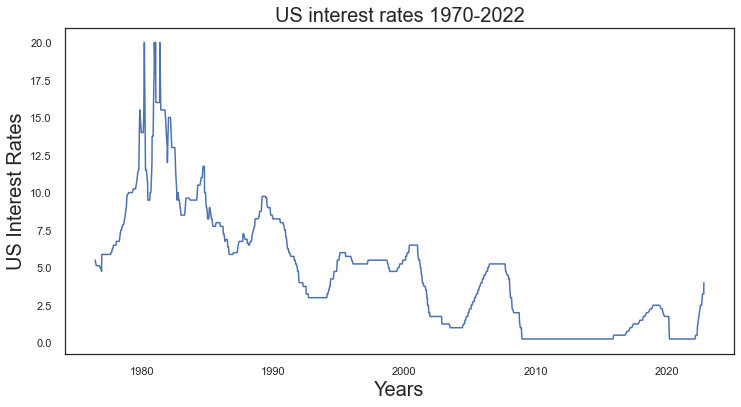

In [93]:
interest_rates_visualization()

In [ ]:
#dxy = pd.read_csv ('../../dataset/Indicators/dxy.csv', encoding='unicode_escape')

In [ ]:
#dxy = cleaned_indicator(dxy)

In [ ]:
#both = pd.concat([interest_rates, dxy], axis=1)
#both.columns.values[0] = "interest_rates"
#both.columns.values[1] = "dxy"
#both.head()

In [ ]:
cpi = pd.read_csv ('../../dataset/Indicators/cpi_yoy.csv', encoding='unicode_escape')

In [ ]:
cpi = cleaned_indicator(cpi)

In [ ]:
def cpi_visualization():
    plt.plot(cpi, color= 'b')
    plt.title('Consumer Price Index (CPI) YoY Change', fontsize= 20)
    plt.xlabel('Date', fontsize= 20)
    plt.ylabel('CPI YoY (%)', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

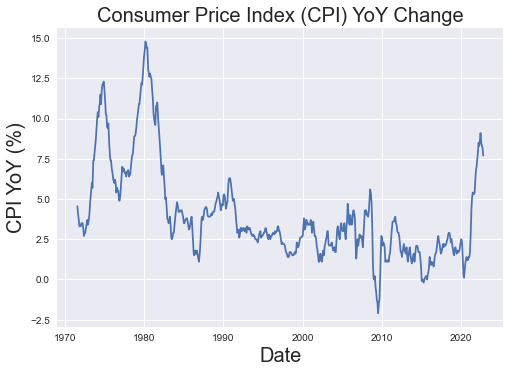

In [ ]:
cpi_visualization()

NameError: name 'm2' is not defined

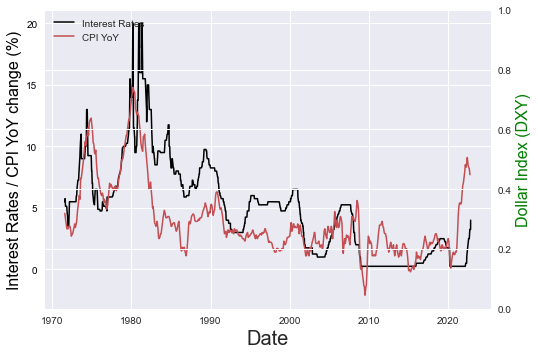

In [ ]:
fig, ax1 = plt.subplots()
#fig.set_facecolor("white")

#color = 'tab:black'
ax1.set_xlabel('Date', fontsize= 20)
ax1.set_ylabel('Interest Rates / CPI YoY change (%)', color='black', fontsize= 16)
ax1.plot(both.index, both.interest_rates, color='black', label = 'Interest Rates', linewidth=1.5)
plt.legend(loc='upper left')
ax1.plot(cpi.index, cpi.close, color = "r", label = 'CPI YoY', linewidth=1.5)
plt.legend(loc='upper left')
ax1.tick_params(axis='y', labelcolor='black')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Dollar Index (DXY)', color="green", fontsize= 16)  # we already handled the x-label with ax1
ax2.plot(m2.index, m2['close (in billions)'], color="green", label = 'M2', linewidth=1.5, linestyle='dotted')
ax2.tick_params(axis='y', labelcolor="green")


#color = 'tab:cyan'
#ax2.set_ylabel('Dollar Index (DXY)', color=color, fontsize= 16)  # we already handled the x-label with ax1
#ax2.plot(both.index, both.dxy, color=color, label = 'DXY', linewidth=1.5)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Interest Rates, CPI over time", fontsize= 20)
plt.style.use('seaborn-ticks')
print(plt.style.available)
plt.legend(loc= 'upper right')


In [ ]:
m2 = pd.read_csv ('./dataset/monetary supply.csv', encoding='unicode_escape')

In [ ]:
m2['time'] = m2['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
m2['time'] = pd.to_datetime(m2["time"])
m2.set_index('time', inplace=True)
m2 = m2.reindex(pd.date_range(start=m2.index.min(),
                                                  end=m2.index.max(),
                                                  freq='1D'))

In [ ]:
m2 = m2[(m2.index >= '1971-08-04') & (m2.index <= '2022-11-02')]


In [ ]:
m2.interpolate(method='linear', inplace=True)

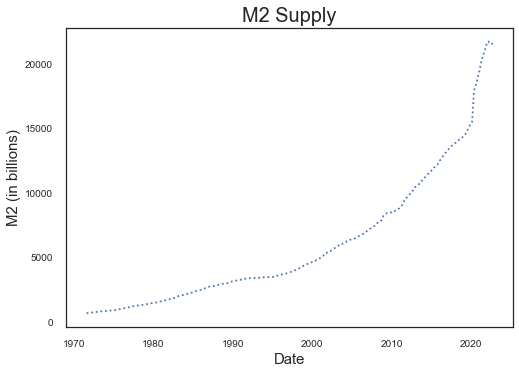

In [ ]:
plt.plot(m2['close (in billions)'], color= 'b', linestyle='dotted')
plt.title('M2 Supply', fontsize= 20)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('M2 (in billions)', fontsize= 15)
plt.style.use('seaborn')

In [ ]:
both['cpi'] = cpi['close']

In [ ]:
three = both.drop(both.tail(32).index,)

In [ ]:
three.to_csv('./dataset/prueba.csv')